# Importing neccessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Loading Datasets

In [4]:
import pandas as pd
heart_dataset = pd.read_csv('/content/Cardiovascular_risk_analyzing_data.csv')
df = pd.read_csv('/content/Cardiovascular_risk_analyzing_data.csv')


In [5]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:

heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_dataset.shape

(303, 14)

In [8]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Heart Dataset Overview

In [9]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Identifing  Missing Values

In [10]:
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)

missing_percentage = (missing_values / len(df)) * 100
print("Percentage of missing values per column:")
print(missing_percentage)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Percentage of missing values per column:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


# Handling Missing Values

In [11]:
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing values per column:")
print(missing_values)

print("Percentage of missing values per column:")
print(missing_percentage)

columns_to_remove = missing_percentage[missing_percentage > 50].index
df.drop(columns=columns_to_remove, inplace=True)

# Impute missing values in numerical columns with the median
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Data after handling missing values:")
print(df.head())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Percentage of missing values per column:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64
Data after handling missing values:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0       

#Remove Duplicates: Detect and eliminate duplicate entries.

In [12]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

print("Duplicate rows:")
print(df[duplicates])

df_cleaned = df.drop_duplicates()

print(f"Shape of the DataFrame before removing duplicates: {df.shape}")
print(f"Shape of the DataFrame after removing duplicates: {df_cleaned.shape}")

print("Data after removing duplicates:")
print(df_cleaned.head())

Number of duplicate rows: 1
Duplicate rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  
Shape of the DataFrame before removing duplicates: (303, 14)
Shape of the DataFrame after removing duplicates: (302, 14)
Data after removing duplicates:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2  

#Correct Inconsistent Formats: Ensure uniformity in date formats, categorical values,numerical precision, etc.

In [13]:
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')  # Coerce errors to NaT if invalid dates exist
    df['date_column'] = df['date_column'].dt.strftime('%Y-%m-%d')  # Convert all dates to 'YYYY-MM-DD'

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:

    df[col] = df[col].str.strip().str.lower()
    df[col] = df[col].replace(['na', 'unknown'], 'unknown')  # Replace 'na' or 'unknown' with 'unknown'
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].round(2)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


#Detecting and Handle Outliers: Use statistical techniques (e.g., IQR, Z-score) to identify and address extreme values.

In [14]:
# Checking if there are any non-numeric columns in the dataset
print("Columns in the dataset:", df.columns)
print("Data types of each column:")
print(df.dtypes)

# Filter only numeric columns for IQR computation
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric columns in the dataset:", numeric_columns)

# Handle missing values by filling them with the median (or you can use other strategies)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25th percentile):\n", Q1)
print("Q3 (75th percentile):\n", Q3)
print("IQR:\n", IQR)

df_filtered = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_filtered.shape}")
print(df_filtered.head())

Columns in the dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Data types of each column:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Numeric columns in the dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Q1 (25th percentile):
 age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64
Q3 

#Perform Exploratory Data Analysis (EDA)

a. Summary Statistics: Compute mean, median, mode, variance, standard deviation, etc.

In [15]:
numerical_columns = df.select_dtypes(include=['number']).columns

summary_stats = df[numerical_columns].describe().T
print("Summary Statistics (Mean, Median, Mode, etc.):")
print(summary_stats)

mode = df[numerical_columns].mode().iloc[0]
print("\nMode (Most Frequent Values) for Numerical Columns:")
print(mode)

# Step 3: Compute Variance for each numerical column
variance = df[numerical_columns].var()
print("\nVariance for Numerical Columns:")
print(variance)

# Step 4: Compute Standard Deviation for each numerical column
std_dev = df[numerical_columns].std()
print("\nStandard Deviation for Numerical Columns:")
print(std_dev)

# Step 5: Compute Skewness and Kurtosis (optional for deeper analysis)
# Skewness measures the asymmetry of the distribution.
# Kurtosis measures the "tailedness" of the distribution.
skewness = df[numerical_columns].skew()
kurtosis = df[numerical_columns].kurtosis()

print("\nSkewness for Numerical Columns:")
print(skewness)
print("\nKurtosis for Numerical Columns:")
print(kurtosis)

Summary Statistics (Mean, Median, Mode, etc.):
          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.

#Histograms:

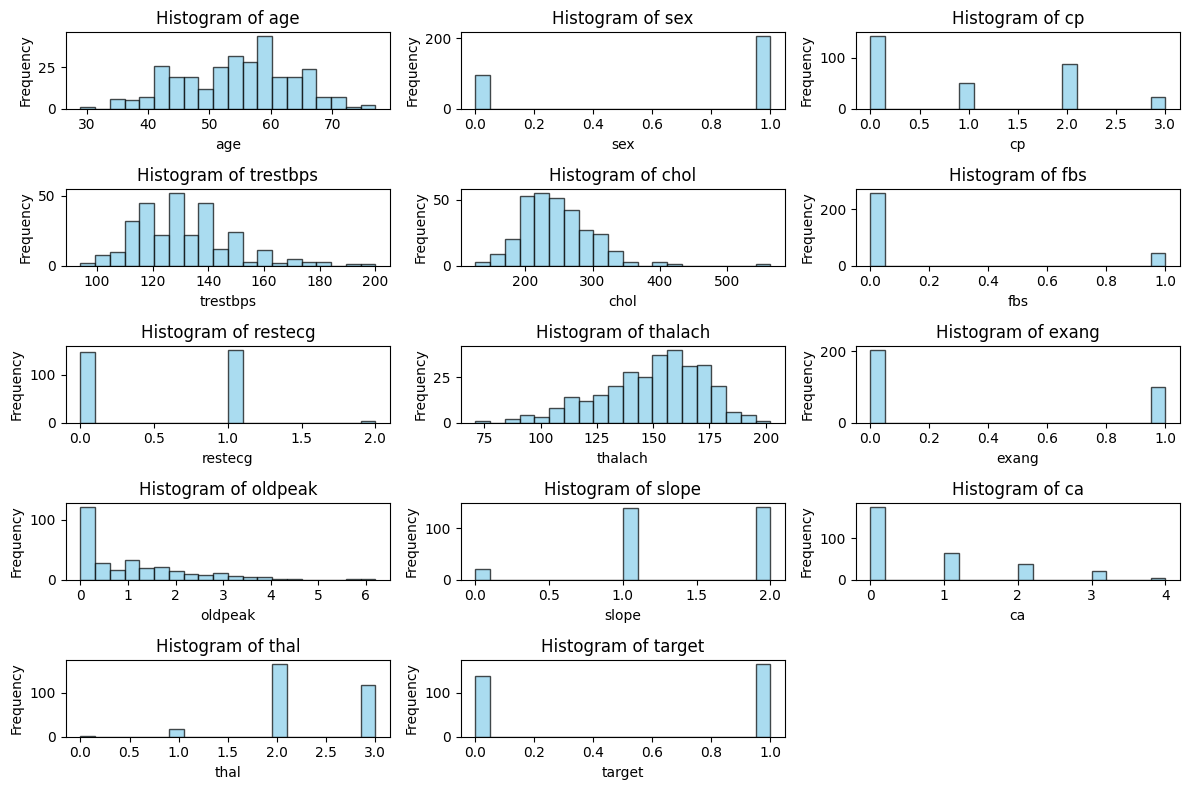

In [16]:
import matplotlib.pyplot as plt
import math

# Step 1: Create histograms for numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = math.ceil(len(numerical_columns) / num_cols)  # Calculate number of rows

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through numerical columns and create histograms
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)  # Adjust subplot grid
    df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()

#Box Plots:

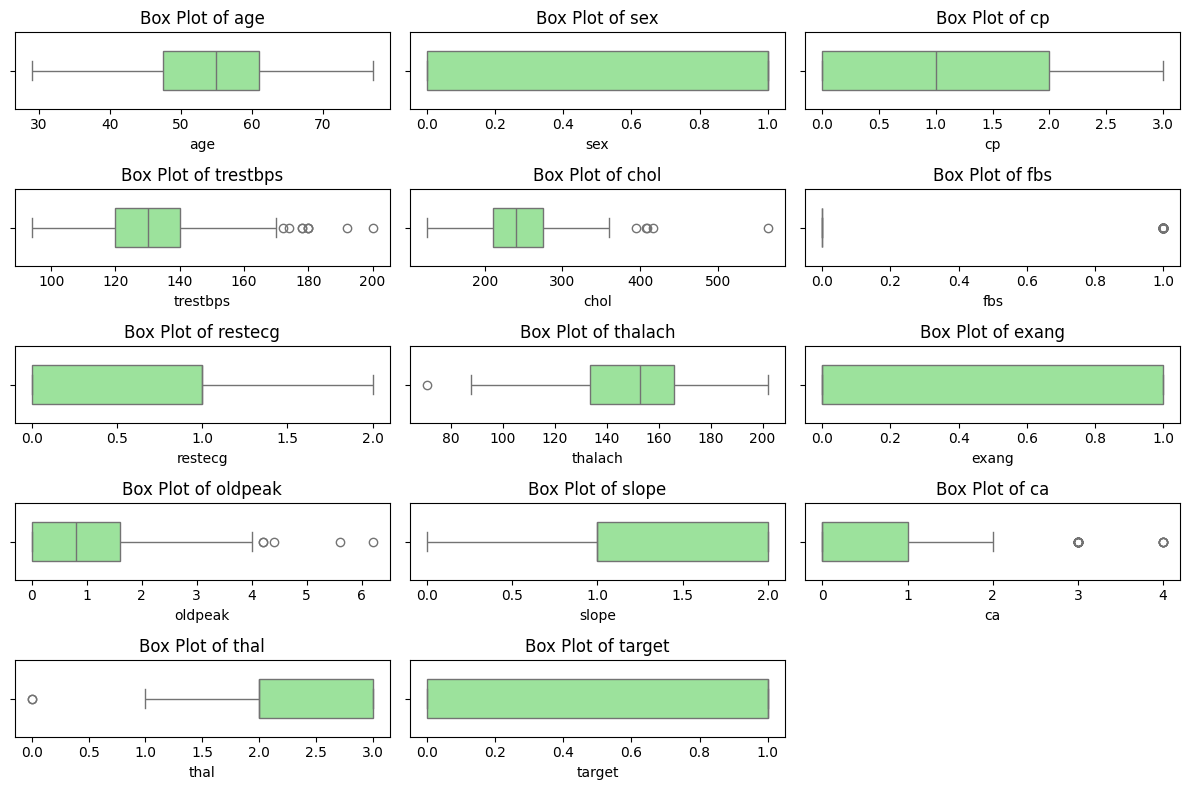

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Step 2: Create box plots for numerical columns
plt.figure(figsize=(12, 8))

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = math.ceil(len(numerical_columns) / num_cols)  # Calculate number of rows

# Create box plots for numerical columns
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)  # Adjust subplot grid
    sns.boxplot(x=df[col], color='lightgreen', width=0.5)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()

#Scatter Plots:

Column names in the dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


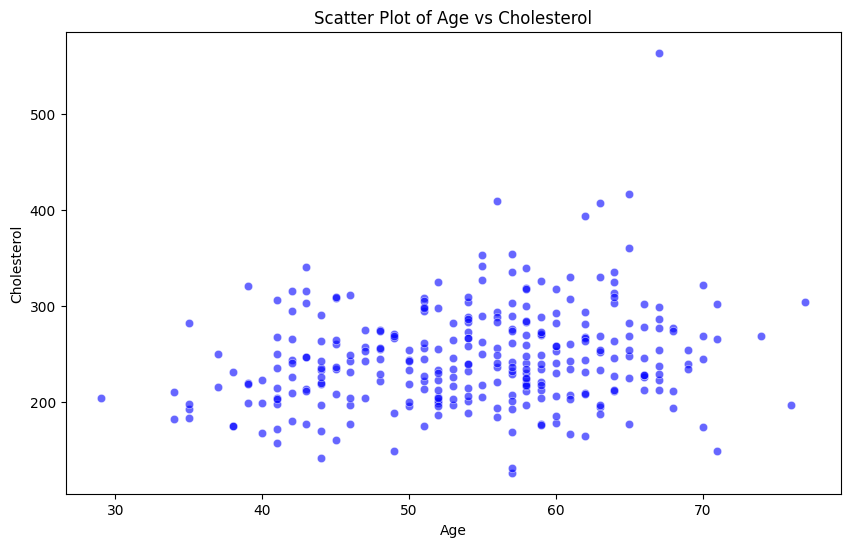

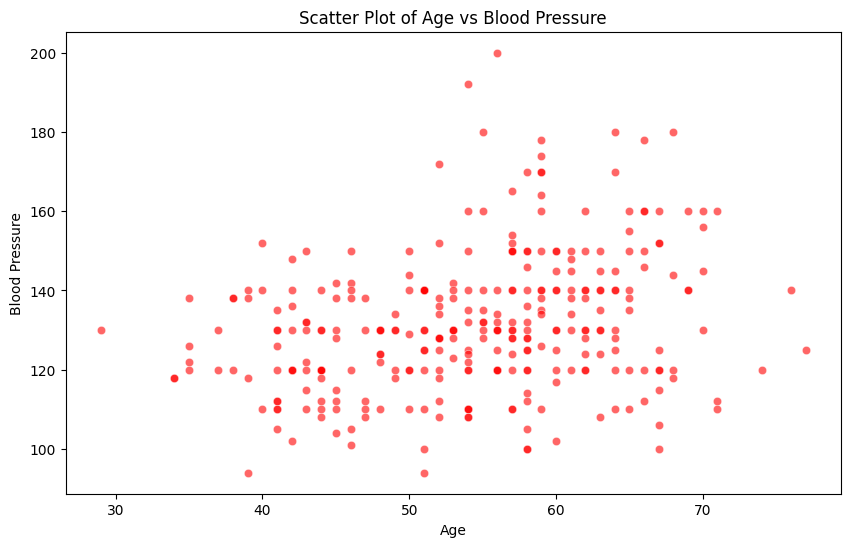

In [18]:
# Step 1: Check the column names to ensure they match
print("Column names in the dataset:")
print(df.columns)

# Step 2: Clean the data: Convert columns to numeric (if necessary) and handle missing values
# Convert columns to numeric, forcing errors to NaN if conversion fails
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# Assuming 'chol' is the actual column name for cholesterol:
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')  # Changed 'cholesterol' to 'chol'

# **FIX:** Replace 'blood_pressure' with the actual column name from your dataset
# For example, if the actual column name is 'trestbps':
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')

# Handle missing values: You can either drop or fill missing values
# **FIX:** Update the subset to include the correct column name
df = df.dropna(subset=['age', 'chol', 'trestbps'])

# Step 3: Scatter plot of 'age' vs 'cholesterol'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['chol'], color='blue', alpha=0.6)  # Changed 'cholesterol' to 'chol'
plt.title("Scatter Plot of Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

# Step 4: Scatter plot of 'age' vs 'blood_pressure'
plt.figure(figsize=(10, 6))
# **FIX:** Update the scatterplot to use the correct column name
sns.scatterplot(x=df['age'], y=df['trestbps'], color='red', alpha=0.6)
plt.title("Scatter Plot of Age vs Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.show()

#Correlation Matrix:

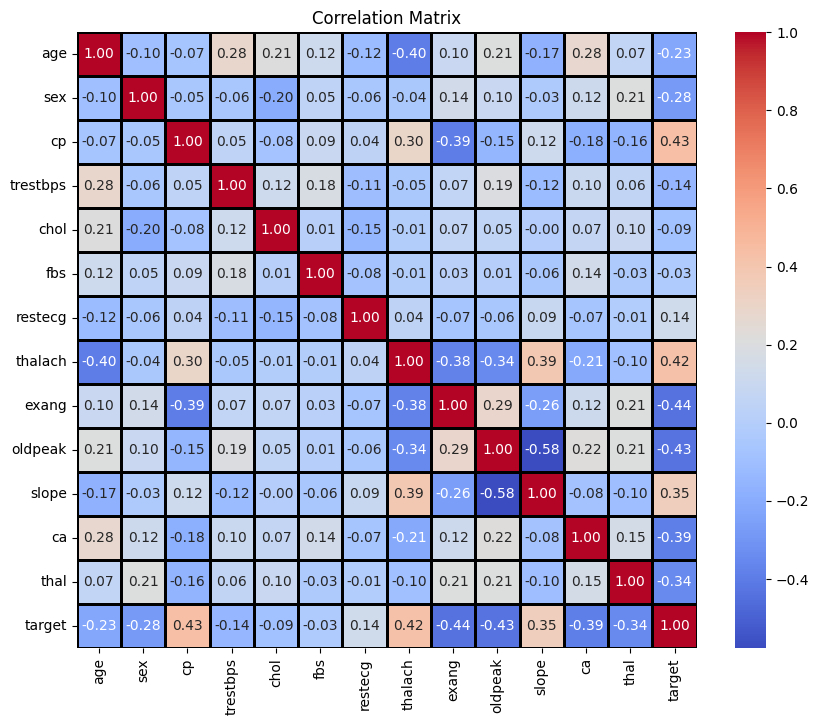

In [19]:
# Step 4: Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix using Seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title("Correlation Matrix")
plt.show()


# Target Variable Distribution:

In [20]:
heart_dataset['target'].value_counts()

,count
target,
1,165
0,138


# Splitting Features and Target for Model Training

In [21]:
X = heart_dataset.drop(columns = 'target', axis = 1)
Y = heart_dataset['target']


### a. Feature Engineering
- Applying  PCA (Principal Component Analysis) to reduce dimensionality if needed.


In [22]:
# Feature Scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
# You can choose to use X_pca or X_scaled for model training
# We'll proceed with X_scaled

# Count Plot of Heart Disease Cases

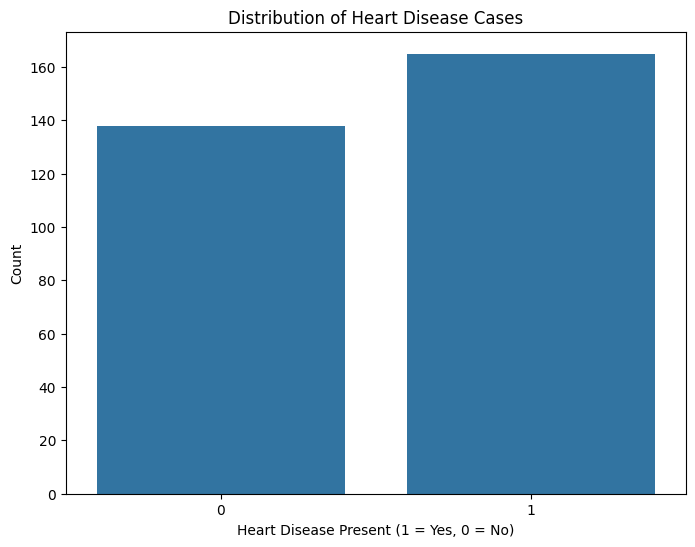

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_dataset, x='target')  # Replace 'target' with your actual target column name
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Present (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [24]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [25]:

print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Correlation Heatmap Analysis

In [26]:
# Correlation Heatmap Analysis

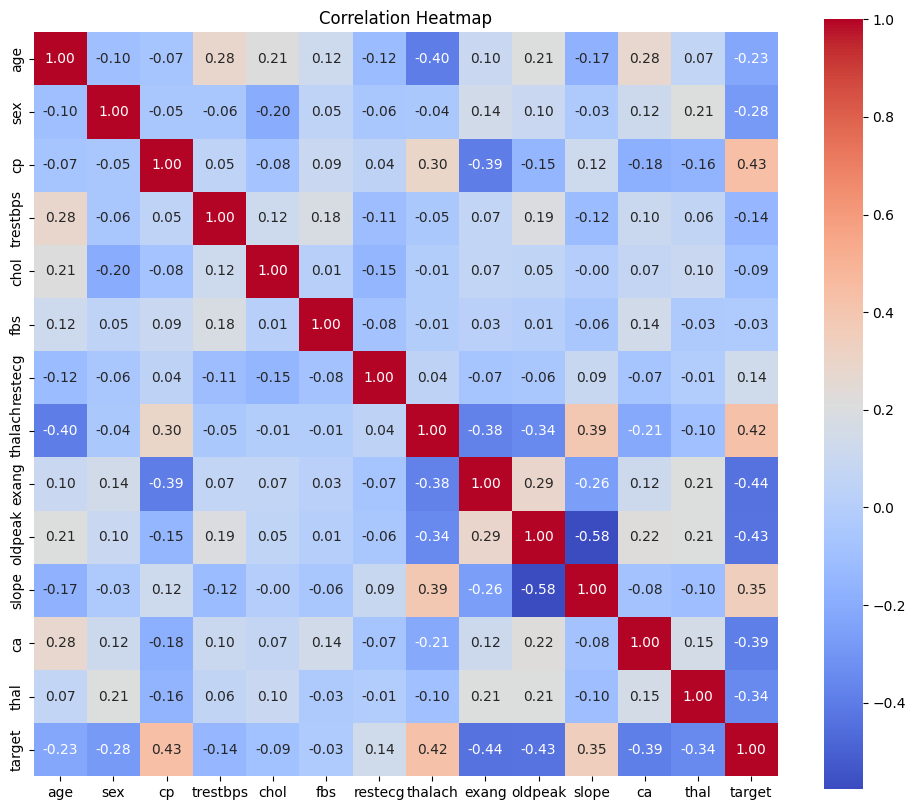

In [27]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


# Catplot to visualize multiple categorical variables

Helps for effective exploratory data analysis, model interpretation, performance assessment, and validation of assumptions

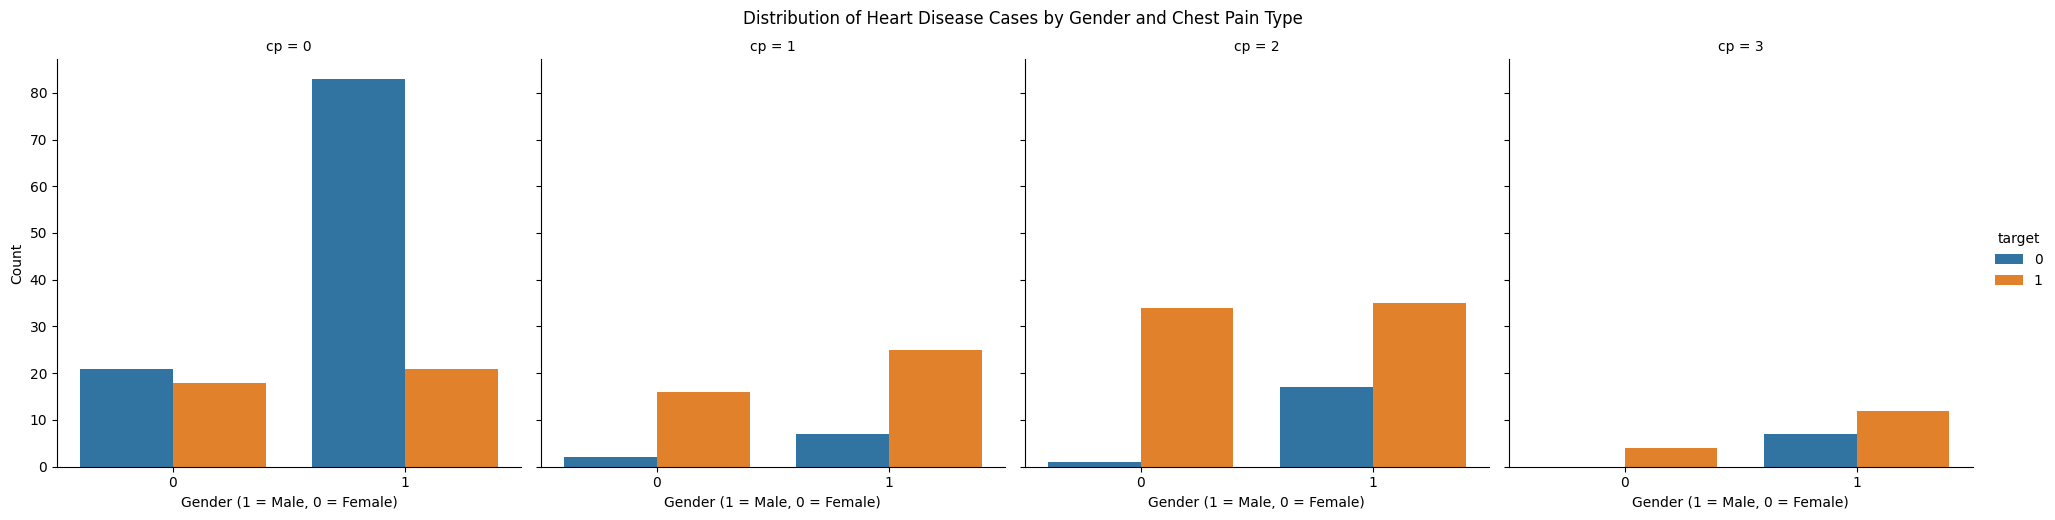

In [28]:
g = sns.catplot(data=heart_dataset, x='sex', hue='target', kind='count', col='cp')  # Replace 'cp' with another categorical variable
g.fig.suptitle('Distribution of Heart Disease Cases by Gender and Chest Pain Type', y=1.03)
g.set_axis_labels('Gender (1 = Male, 0 = Female)', 'Count')
plt.show()


# Training and Testing Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)

# Shape Overview

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Logistic Regression for Cardiovascular Risk Analyzer

model = LogisticRegression()

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=500)

# Evaluating Logistic Regression on Training Data

In [32]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#  Evaluating Model Performance

In [33]:

print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.45454545454545453


 # Accuracy on Test Data with Logistic Regression

In [34]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Accuracy of Logistic Regression on Test Data"

In [35]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.45901639344262296


# Evaluating Heart Health Based on Input Values

In [36]:
input_values = (70, 1, 2, 160, 269, 0, 1, 112, 1, 2.9, 1, 1, 3)
input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1, -1)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_values_df = pd.DataFrame(input_values_reshaped, columns=feature_names)
prediction = model.predict(input_values_df)
if prediction[0] == 0:
    print("This Person's Heart is Good.")
else:
    print("This Person's Heart is in Disease.")

This Person's Heart is Good.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Model Evaluation and Validation


In [37]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create the trained_models dictionary and add your model to it
trained_models = {'Logistic Regression': model}  # Assuming 'model' is your LogisticRegression object

# Assuming Y_test is the correct variable name for the test set target data
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}") # Changed y_test to Y_test
    print(f"Precision: {precision_score(Y_test, y_pred):.4f}") # Changed y_test to Y_test
    print(f"Recall: {recall_score(Y_test, y_pred):.4f}") # Changed y_test to Y_test
    print(f"F1 Score: {f1_score(Y_test, y_pred):.4f}") # Changed y_test to Y_test
    if y_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(Y_test, y_proba):.4f}") # Changed y_test to Y_test
    print()

--- Logistic Regression ---
Accuracy: 0.4590
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.6602



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# ROC Curve (Receiver Operating Characteristics )

The ROC curve is an essential tool for evaluating and
interpreting the performance of logistic regression models
in binary classification tasks

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


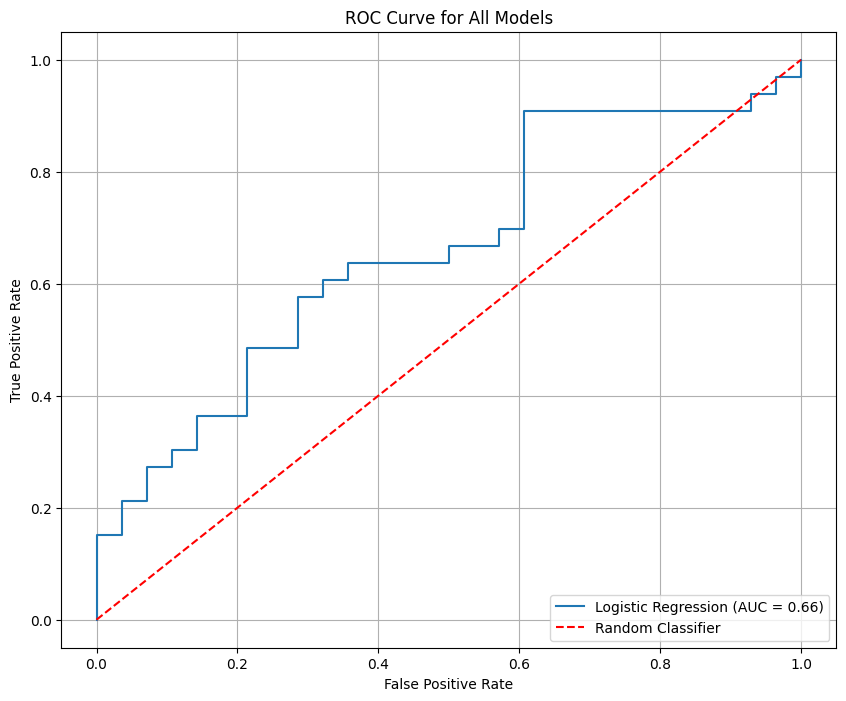

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'model' is your LogisticRegression object
trained_models = {'Logistic Regression': model}

# Plot ROC Curves for all models that support predict_proba
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_proba) # Changed y_test to Y_test to match variable name
        roc_auc = roc_auc_score(Y_test, y_proba) # Changed y_test to Y_test to match variable name
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier")

plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()